In [1]:
from ultralytics import YOLO
import onnxruntime as ort
import matplotlib as plt
from PIL import Image
import numpy as np

In [2]:
TEST = YOLO('./9_epochs.pt')

In [3]:
test_image = '../Downtown_Denver.jpg'

In [4]:
TEST_Pred = TEST.predict(test_image, conf=0.2)


image 1/1 c:\Users\Alex_Compu\Downloads\9_epochs\..\Downtown_Denver.jpg: 384x640 1 Building, 66.5ms
Speed: 1.0ms preprocess, 66.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


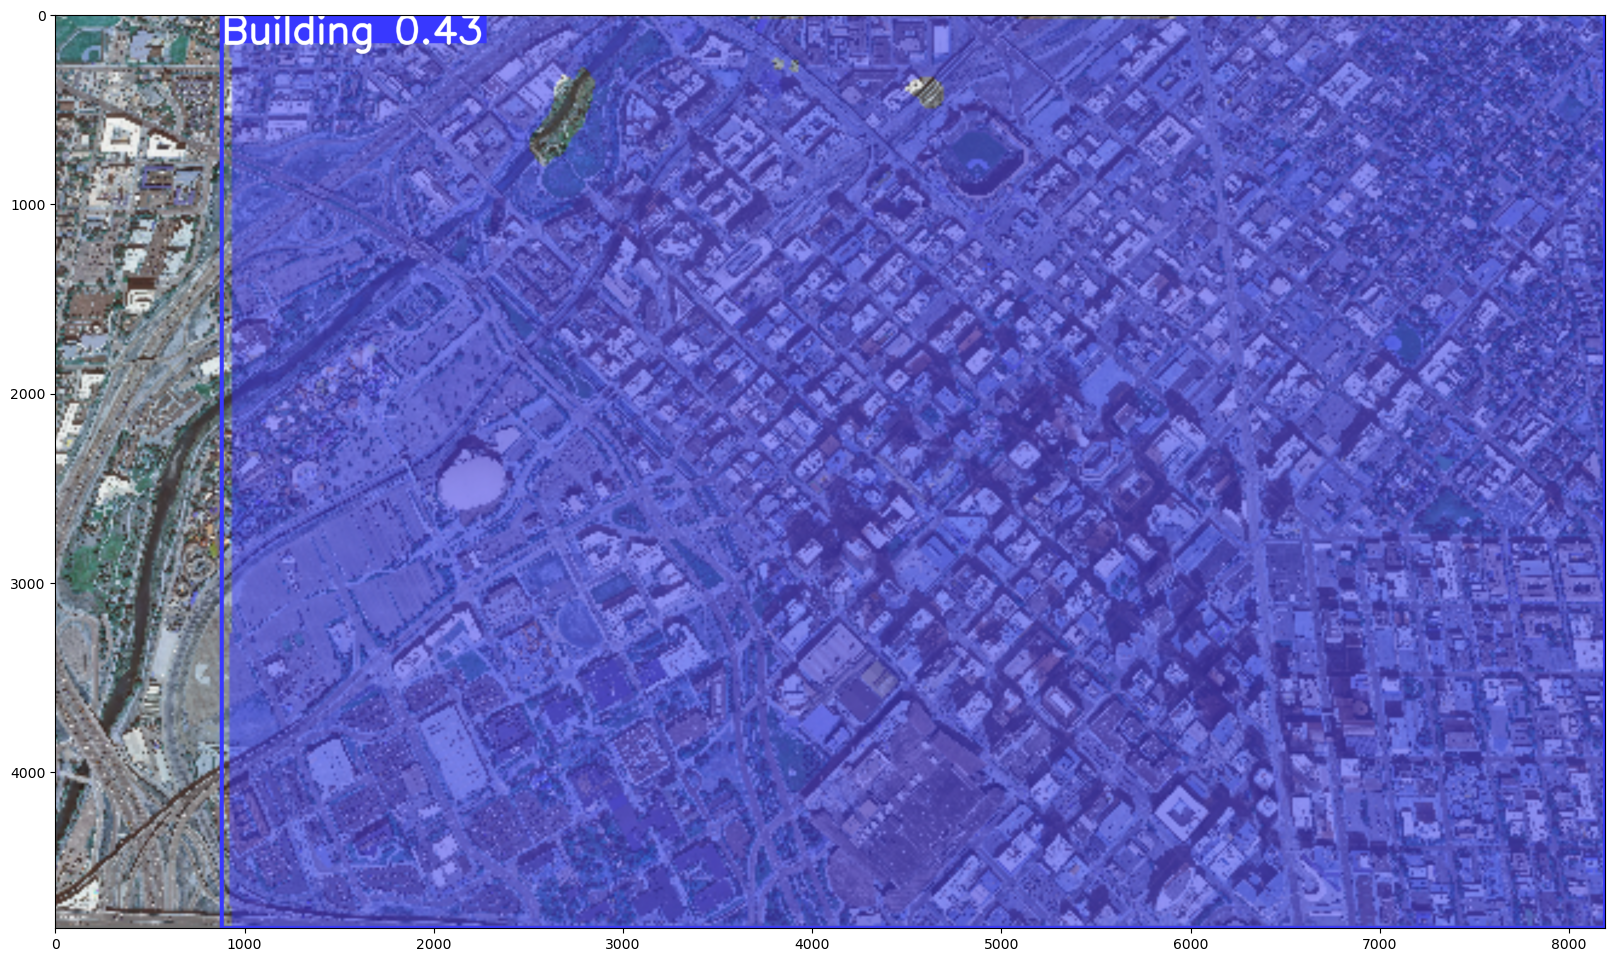

In [5]:
import matplotlib.pyplot as plt

test_image_1_array = TEST_Pred[0].plot()
plt.figure(figsize=(20, 20))
plt.imshow(test_image_1_array)

In [6]:
TEST.export(format = "onnx", imgsz=[640,640])

Ultralytics YOLOv8.0.206  Python-3.11.5 torch-2.0.1+cpu CPU (AMD Ryzen 9 6900HX with Radeon Graphics)

PyTorch: starting from '9_epochs.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (37.9 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success  0.8s, saved as '9_epochs.onnx' (12.6 MB)

Export complete (2.4s)
Results saved to C:\Users\Alex_Compu\Downloads\9_epochs
Predict:         yolo predict task=segment model=9_epochs.onnx imgsz=640  
Validate:        yolo val task=segment model=9_epochs.onnx imgsz=640 data=/content/data/data.yaml  
Visualize:       https://netron.app


============== Diagnostic Run torch.onnx.export version 2.0.1+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'9_epochs.onnx'

In [7]:
model = ort.InferenceSession("./9_epochs.onnx")


In [8]:
inputs = model.get_inputs()
len(inputs)


1

In [9]:
input = inputs[0]

print("Name: ",input.name)
print("Shape: ",input.shape)
print("Type: ",input.type)


Name:  images
Shape:  [1, 3, 640, 640]
Type:  tensor(float)


In [10]:
for input in inputs:
    print("Name: ", input.name)
    print("Shape: ", input.shape)
    print("Type: ", input.type)

Name:  images
Shape:  [1, 3, 640, 640]
Type:  tensor(float)


In [11]:

img = Image.open("./test/images/Donetsk_2022_R1C8_10000_10500_11000_11500_jpg.rf.5f2815afcb049f25a665c38d35ab7ca3.jpg")

# save original image size for future
img_width, img_height = img.size;
# convert image to RGB,
img = img.convert("RGB");
# resize to 640x640
img = img.resize((640,640))

# convert the image to tensor 
# of [1,3,640,640] as required for 
# the model input
input = np.array(img)
input = input.transpose(2,0,1)
input = input.reshape(1,3,640,640).astype('float32')
input = input/255.0


In [12]:
outputs = model.get_outputs()
len(outputs)

2

In [13]:
for output in outputs:
    print("Name: ", output.name)
    print("Shape: ", output.shape)
    print("Type: ", output.type)


Name:  output0
Shape:  [1, 37, 8400]
Type:  tensor(float)
Name:  output1
Shape:  [1, 32, 160, 160]
Type:  tensor(float)


In [14]:
outputs = model.run(None, {"images":input})
len(outputs)


2

In [15]:
output0 = outputs[0]
output1 = outputs[1]
print("Output0:",output0.shape,"Output1:",output1.shape)


Output0: (1, 37, 8400) Output1: (1, 32, 160, 160)


In [16]:
output0 = output0[0].transpose()
output1 = output1[0]
print("Output0:",output0.shape,"Output1:",output1.shape)


Output0: (8400, 37) Output1: (32, 160, 160)


In [17]:
boxes = output0[:,0:5]
masks = output0[:,5:]
print("Boxes:",boxes.shape,"Masks:",masks.shape)

Boxes: (8400, 5) Masks: (8400, 32)


In [18]:
print(masks.shape,output1.shape)

(8400, 32) (32, 160, 160)


In [19]:
output1 = output1.reshape(32,160*160)
print(masks.shape,output1.shape)


(8400, 32) (32, 25600)


In [ ]:
masks =  masks @ output1
print(masks.shape)

In [ ]:
print(boxes.shape,masks.shape)

In [ ]:
boxes = np.hstack((boxes,masks))
print(boxes.shape)

In [ ]:
mask_1 = result[0][6]
print(mask_1)


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
mask_1 = sigmoid(mask)
print(mask_1)

In [ ]:
mask_1 = (mask > 0.5).astype('uint8')*255

In [ ]:
img_mask = Image.fromarray(mask_1,"L")
img_mask
